In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assignment 4

## Image Segmentation using K-means

Implement K-means algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images. Apply K-means to the images 'home' and 'flower' shown in Figure 1. Try K=2 and K=3. Run the algorithm for 10 iterations and display the resulting segmented images in each case.

In [2]:
def display_single_image(img, name):
    """Display a single image nicely."""
    plt.figure(figsize=(20, 20))
    plt.subplot(111), plt.imshow(img, cmap="gray")
    plt.title(name), plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
def convert_to_grey(img):
    """Returns the greyscale conversion of an image."""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

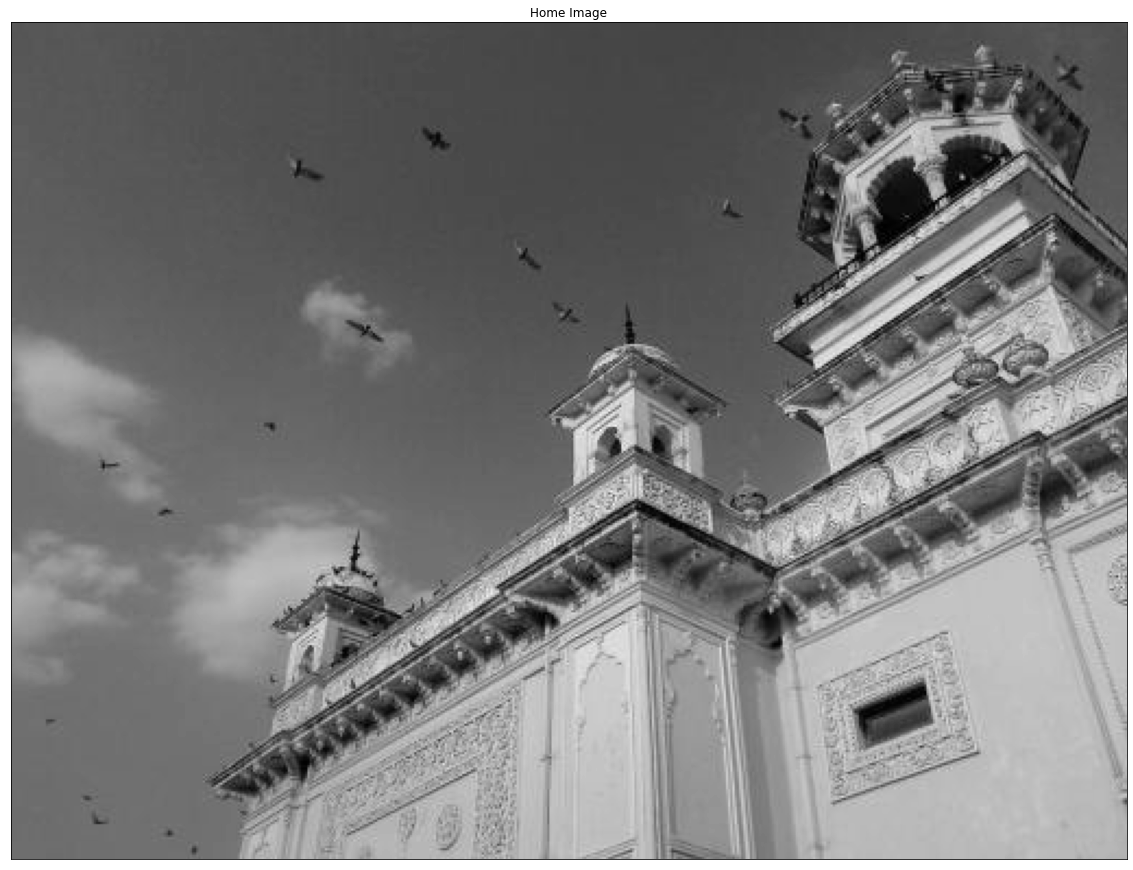

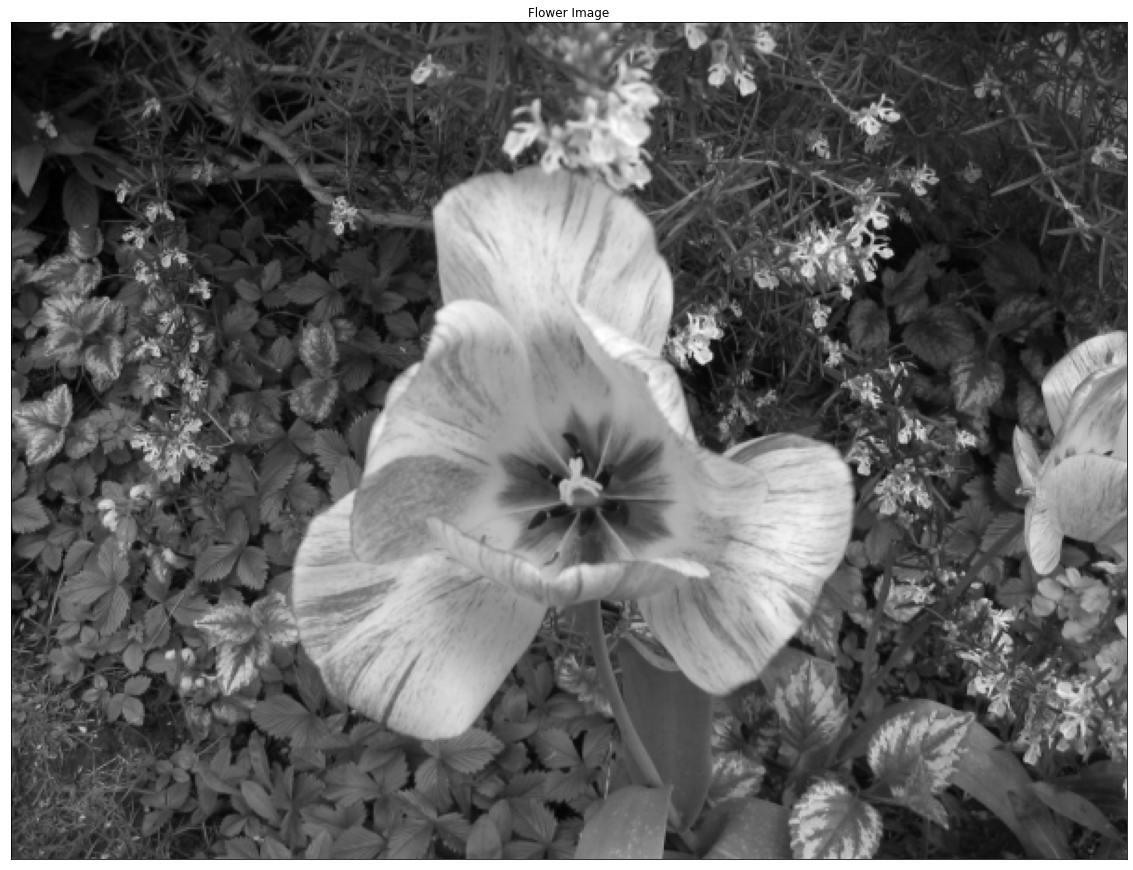

In [4]:
# load in reference images
home_img = cv2.imread("home.jpg")
flower_img = cv2.imread("flower.jpg")
home_grey = convert_to_grey(home_img)
flower_grey = convert_to_grey(flower_img)
display_single_image(home_grey, "Home Image")
display_single_image(flower_grey, "Flower Image")

In [18]:
def kmeans(img, k, num_iterations):
  cluster_centers = []
    
  # generate random cluster centers
  for i in range(k):
    cluster_centers.append(np.random.randint(0, 256, 3))
  cluster_centers = np.array(cluster_centers)

  for i in range(num_iterations):
    # find the euclidean distance between each pixel and the cluster centers, take index of smallest
    if k == 2:
      labels = np.array([np.argmin([np.linalg.norm(j - cluster_centers[0]),np.linalg.norm(j - cluster_centers[1])], axis=0) for j in img])
    elif k == 3:
      labels = np.array([np.argmin([np.linalg.norm(j - cluster_centers[0]),np.linalg.norm(j - cluster_centers[1]), np.linalg.norm(j - cluster_centers[2])], axis=0) for j in img])
    
    cluster_centers = []

    for n in range(k):
      f = img[labels == n]
      cluster_centers.append(np.mean(f, axis=0))

    cluster_centers = np.array(cluster_centers)

  return labels, cluster_centers

In [19]:
# perform k-means for k=2
home_height, home_width = home_img.shape[:2]
home_labels_2, home_centers_2 = kmeans(home_img.reshape((-1, 3)), 2, 10)
home_labels_3, home_centers_3 = kmeans(home_img.reshape((-1, 3)), 3, 10)

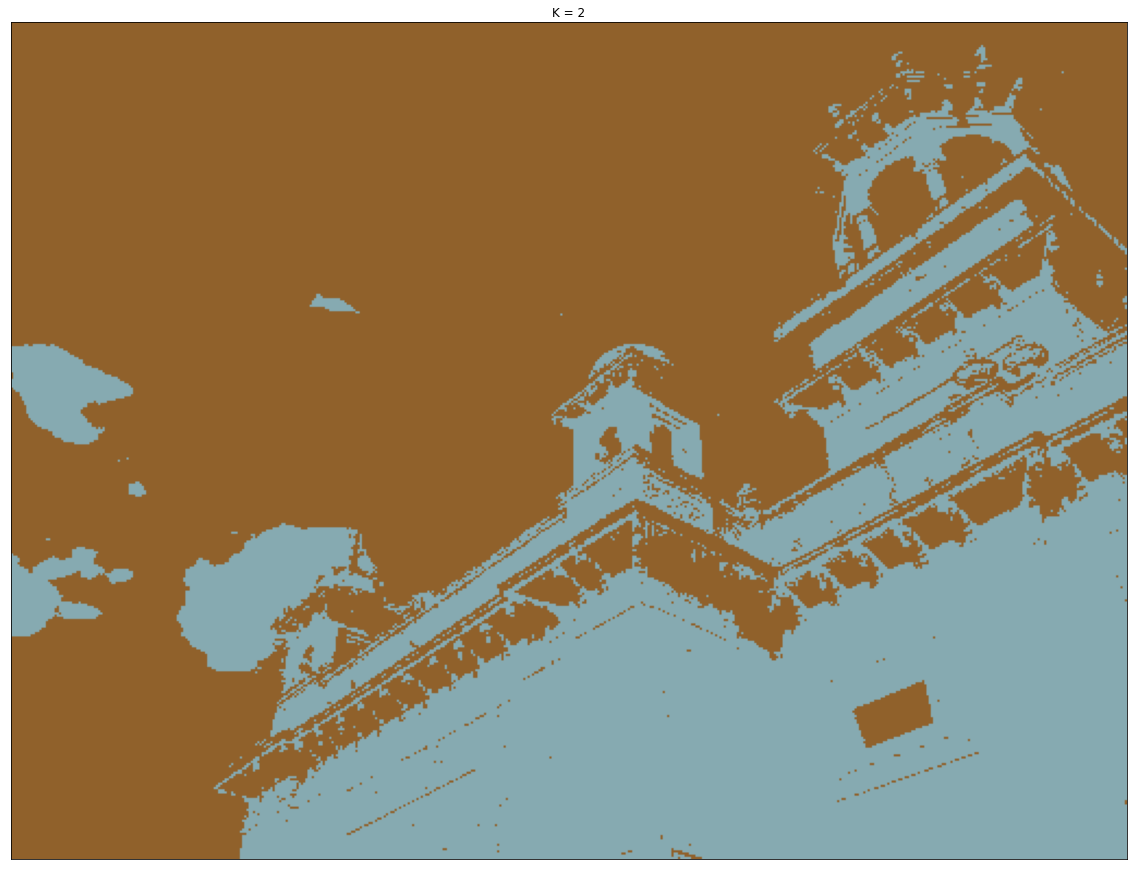

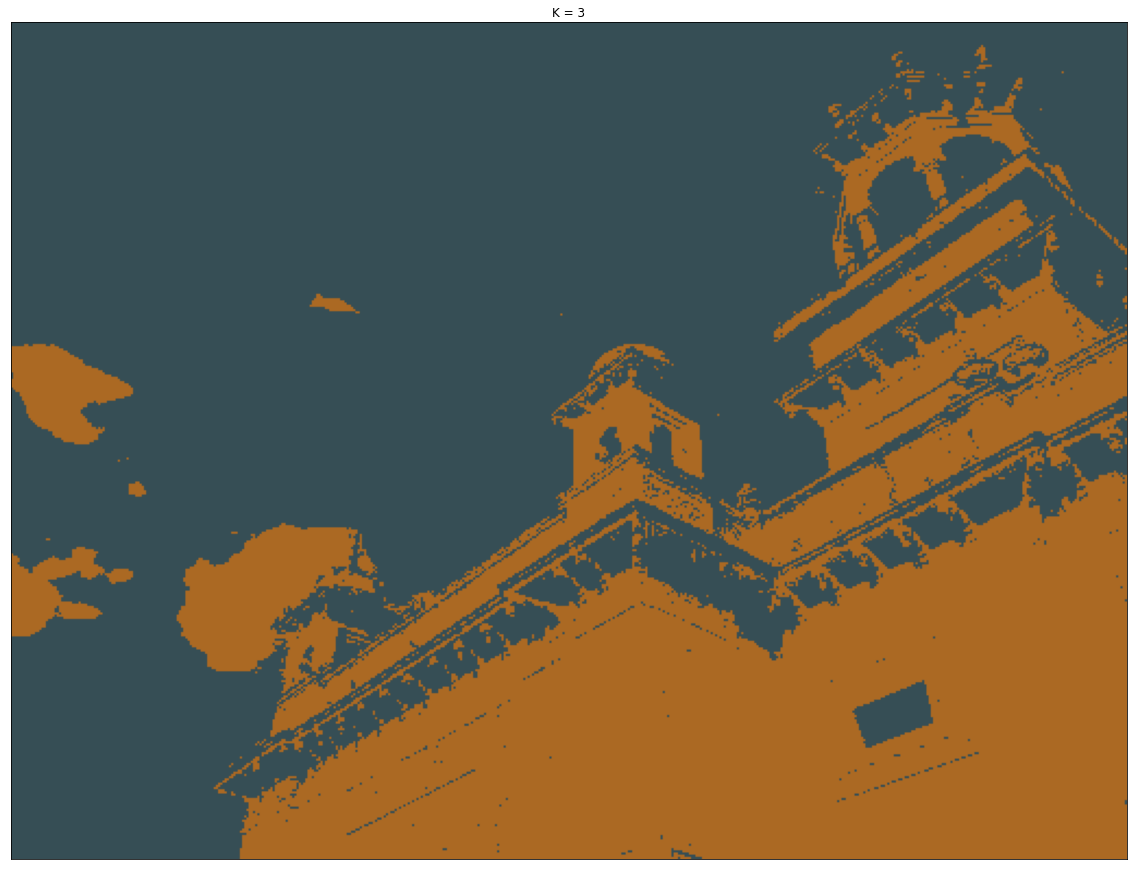

In [20]:
# display segmented home images
home_disp_2 = np.asarray([home_centers_2[label] for label in home_labels_2])
home_disp_3 = np.asarray([home_centers_3[label] for label in home_labels_2])

home_segmented_2 = np.reshape(home_disp_2, (home_height, home_width, 3)).astype("uint8")
home_segmented_3 = np.reshape(home_disp_3, (home_height, home_width, 3)).astype("uint8")

display_single_image(home_segmented_2, "K = 2")
display_single_image(home_segmented_3, "K = 3")

In [21]:
# perform k-means for k=2
flower_height, flower_width = flower_img.shape[:2]
flower_labels_2, flower_centers_2 = kmeans(flower_img.reshape((-1, 3)), 2, 10)
flower_labels_3, flower_centers_3 = kmeans(flower_img.reshape((-1, 3)), 3, 10)

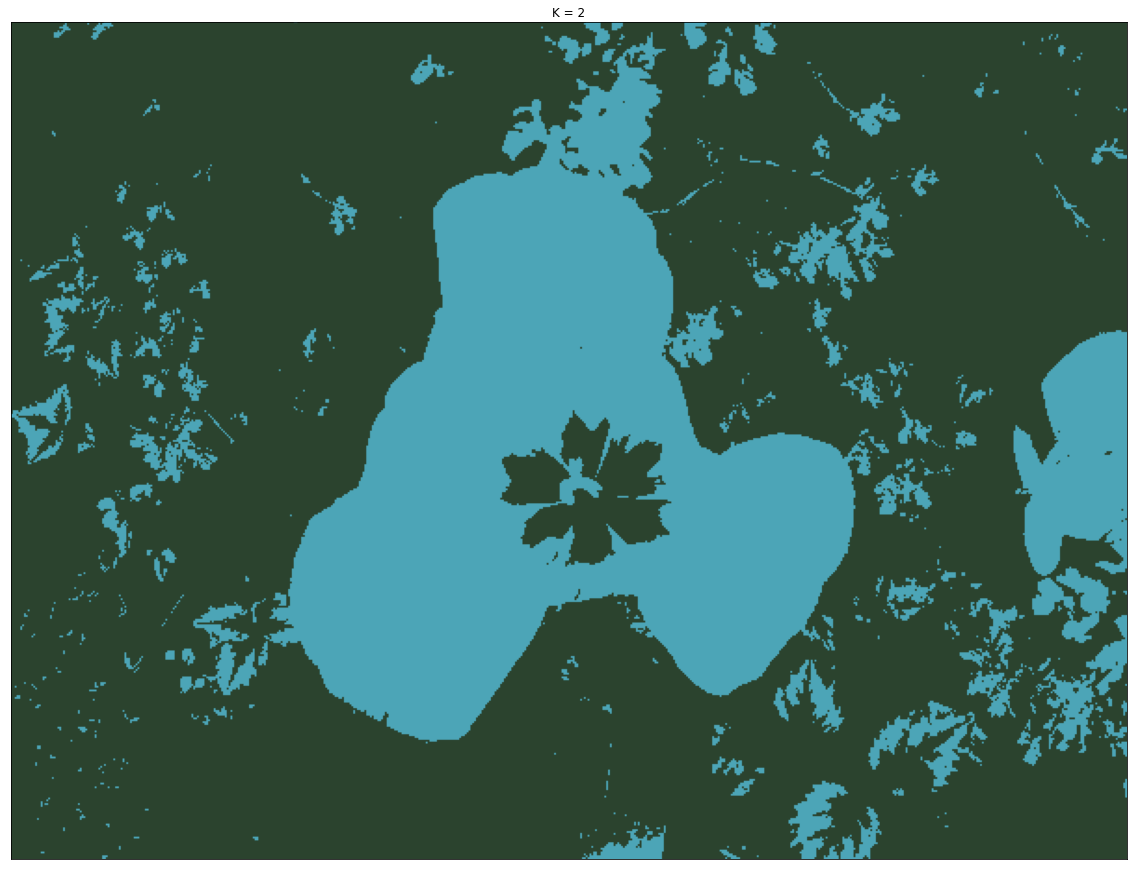

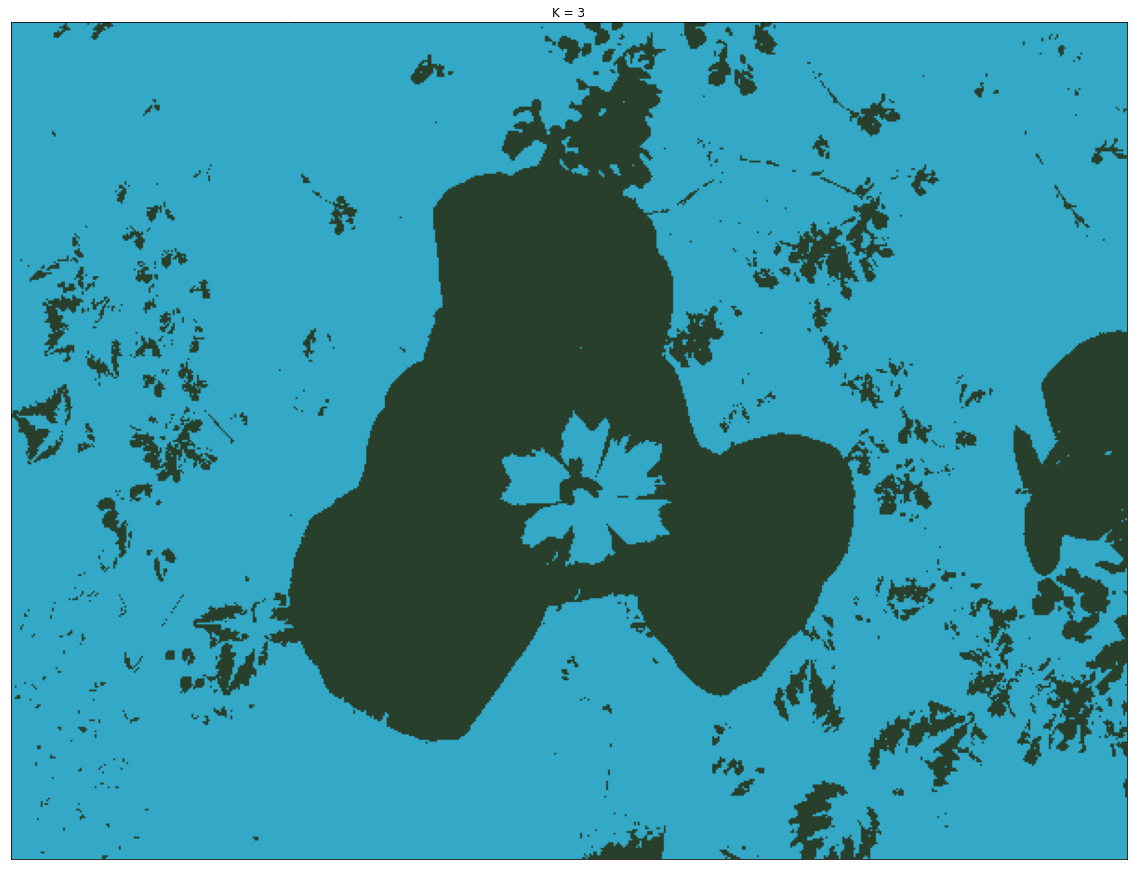

In [22]:
# display segmented flower images
flower_disp_2 = np.asarray([flower_centers_2[label] for label in flower_labels_2])
flower_disp_3 = np.asarray([flower_centers_3[label] for label in flower_labels_2])

flower_segmented_2 = np.reshape(flower_disp_2, (flower_height, flower_width, 3)).astype("uint8")
flower_segmented_3 = np.reshape(flower_disp_3, (flower_height, flower_width, 3)).astype("uint8")

display_single_image(flower_segmented_2, "K = 2")
display_single_image(flower_segmented_3, "K = 3")